In [55]:
!pip install streamlit

In [56]:
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [57]:
from google.colab import files
uploaded = files.upload()

Saving suv_data.csv to suv_data (3).csv


In [58]:
suv_car_df = pd.read_csv('suv_data.csv')

In [59]:
X = suv_car_df.iloc[:,[2,3]]
y = suv_car_df.iloc[:,4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)


In [60]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [61]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [62]:
def app():
    # Load image
    image_path = 'suv_car.jpeg'
    # Display image centered with fixed size of 200x200
    with st.container():
        st.image(image_path, width=350)

    st.title("SUV Car Purchasing Prediction")
    st.write("This app predicts whether a customer will purchase an SUV car based on their age and salary.")

    # Collect user input
    age = st.slider("Select age:", min_value=18, max_value=100, step=1, value=30)
    salary = st.slider("Select salary:", min_value=10000, max_value=200000, step=1000, value=50000)


    # Make prediction
    X_new = [[age, salary]]
    X_new_scaled = sc.transform(X_new)
    y_new = model.predict(X_new_scaled)


    # Display prediction
    if y_new == 1:
        st.write("This person has bought the SUV car.")
    else:
        st.write("This person has not bought the SUV car.")

In [63]:
suv_car_df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [64]:
suv_car_df.shape

(400, 5)

In [65]:
 from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test

array([[-4.74614721e-01, -2.99858675e-01],
       [-1.04188331e+00,  3.99520159e-01],
       [-1.23097284e+00,  4.86942513e-01],
       [-1.89089530e-03, -5.91266522e-01],
       [-1.04188331e+00,  5.16083298e-01],
       [ 1.79445964e+00, -1.29064536e+00],
       [ 7.54467226e-01,  5.16083298e-01],
       [ 1.32173582e+00,  1.97312253e+00],
       [ 1.03810152e+00,  5.45224083e-01],
       [-1.89089530e-03, -5.62125738e-01],
       [-1.89089530e-03, -3.28999460e-01],
       [-1.04188331e+00, -4.74703383e-01],
       [-1.23097284e+00,  2.82957020e-01],
       [ 2.81743400e-01, -2.99858675e-01],
       [ 2.81743400e-01, -5.62125738e-01],
       [-3.80069956e-01, -7.95252016e-01],
       [-1.13642808e+00, -5.32984953e-01],
       [-1.13642808e+00, -1.61119399e+00],
       [-1.32551761e+00, -4.45562599e-01],
       [-1.32551761e+00, -1.49463085e+00],
       [-1.90980426e-01, -4.74703383e-01],
       [-9.47338546e-01, -3.28999460e-01],
       [-1.89278620e+00,  3.41238589e-01],
       [ 1.

In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [67]:
train_y_pred = model.predict(X_train)
test_y_pred = model.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score
print("Train set accuracy is :",accuracy_score(train_y_pred,y_train))
print('Test set accuracy is ',accuracy_score(test_y_pred,y_test))

Train set accuracy is : 0.8333333333333334
Test set accuracy is  0.87


In [69]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,test_y_pred)

In [70]:
cf

array([[65,  5],
       [ 8, 22]])

<Axes: >

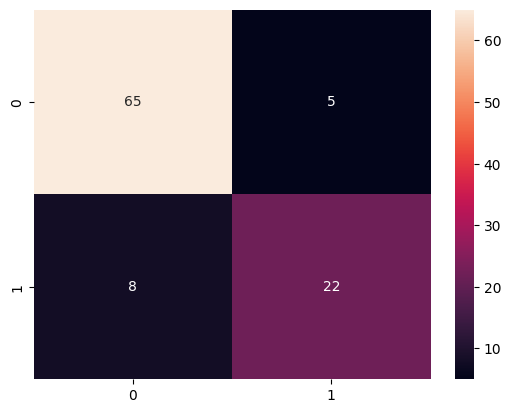

In [71]:
import seaborn as sns
sns.heatmap(cf,annot=True)

In [72]:
def app():
    # Load image
    image_path = '/content/suv_car.jpeg'
    # Display image centered with fixed size of 200x200
    with st.container():
        st.image(image_path, width=350)

    st.title("SUV Car Purchasing Prediction")
    st.write("This app predicts whether a customer will purchase an SUV car based on their age and salary.")

    # Collect user input
    age = st.slider("Select age:", min_value=18, max_value=100, step=1, value=30)
    salary = st.slider("Select salary:", min_value=10000, max_value=200000, step=1000, value=50000)


    # Make prediction
    X_new = [[age, salary]]
    X_new_scaled = sc.transform(X_new)
    y_new = model.predict(X_new_scaled)


    # Display prediction
    if y_new == 1:
        st.write("This person has bought the SUV car.")
    else:
        st.write("This person has not bought the SUV car.")


In [75]:
# Run the app
if __name__ == '__main__':
    app()